In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

C:\Users\sun_y\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\sun_y\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [2]:
covid = pd.read_csv('us-counties-2020.csv')

In [3]:
covid[(covid['county'] == 'Unknown') & (covid['date'] == '2020-12-31')]

,date,county,state,fips,cases,deaths
881582,2020-12-31,Unknown,Alaska,NaN,218,0.0
881672,2020-12-31,Unknown,Arkansas,NaN,2819,0.0
881807,2020-12-31,Unknown,Connecticut,NaN,665,0.0
881812,2020-12-31,Unknown,Delaware,NaN,136,0.0
881877,2020-12-31,Unknown,Florida,NaN,3010,0.0
882026,2020-12-31,Unknown,Georgia,NaN,3623,6.0
882042,2020-12-31,Unknown,Guam,NaN,8286,123.0
882374,2020-12-31,Unknown,Iowa,NaN,694,0.0
882484,2020-12-31,Unknown,Kansas,NaN,0,408.0
882668,2020-12-31,Unknown,Louisiana,NaN,399,0.0


In [4]:
covid = covid[covid['county'] != 'Unknown']

In [5]:
covid['county_state'] = covid['county'] + ", " + covid['state']
covid

,date,county,state,fips,cases,deaths,county_state
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,"Cook, Illinois"
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
...,...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0,"Sweetwater, Wyoming"
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0,"Teton, Wyoming"
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0,"Uinta, Wyoming"
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0,"Washakie, Wyoming"


In [6]:
covid['county'].describe()

count         877254
unique          1929
top       Washington
freq            8777
Name: county, dtype: object

In [7]:
covid['state'].describe()

count     877254
unique        54
top        Texas
freq       67001
Name: state, dtype: object

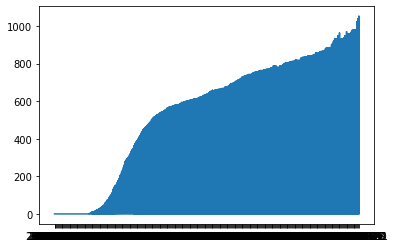

In [8]:
washington_data = covid[covid['state']=='Washington']
plt.plot(washington_data['date'],washington_data['deaths']);

In [9]:
def extract_time_range_data(start_date,end_date):
    diff_deaths = covid[covid['date'] == end_date].set_index('county_state')['deaths'] - covid[covid['date'] == start_date].set_index('county_state')['deaths']
    diff_cases = covid[covid['date'] == end_date].set_index('county_state')['cases'] - covid[covid['date'] == start_date].set_index('county_state')['cases']
    df = covid[covid['date'] == end_date].set_index('county_state')
    df['new_cases'] = diff_cases
    df['new_deaths'] = diff_deaths
    df.drop('cases',inplace=True,axis=1)
    df.drop('deaths',inplace=True,axis=1)
    df.drop('date',inplace=True,axis=1)
    return df

In [10]:
covid_tf = extract_time_range_data('2020-08-01','2020-12-31')
covid_tf = covid_tf.sort_values('new_cases')
covid_tf = covid_tf[~covid_tf['new_cases'].isna()]
covid_tf['mortality'] = covid_tf['new_deaths']/covid_tf['new_cases']
covid_tf.loc[covid_tf['new_cases']==0,'mortality'] = 0
covid_tf.loc[covid_tf['mortality']>=1,'mortality'] = 1
covid_tf


,county,state,fips,new_cases,new_deaths,mortality
county_state,,,,,,
"Tinian, Northern Mariana Islands",Tinian,Northern Mariana Islands,69120.0,1.0,0.0,0.000000
"Harding, New Mexico",Harding,New Mexico,35021.0,7.0,0.0,0.000000
"Hinsdale, Colorado",Hinsdale,Colorado,8053.0,10.0,0.0,0.000000
"Culebra, Puerto Rico",Culebra,Puerto Rico,72049.0,11.0,NaN,NaN
"Haines Borough, Alaska",Haines Borough,Alaska,2100.0,12.0,0.0,0.000000
...,...,...,...,...,...,...
"Miami-Dade, Florida",Miami-Dade,Florida,12086.0,177666.0,2541.0,0.014302
"New York City, New York",New York City,New York,NaN,200716.0,2137.0,0.010647
"Maricopa, Arizona",Maricopa,Arizona,4013.0,203154.0,3036.0,0.014944


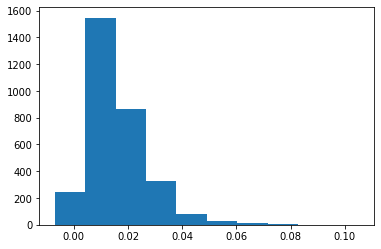

In [11]:
plt.hist(covid_tf['mortality']);

In [12]:
demo = pd.read_csv('New Project 2_Ranking_2022-10-27_17-24-28.csv')
demo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 280 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

In [13]:
# demo_clean['Name']
# covid_tf[covid_tf.index.str.contains('Acadia')]

In [14]:
demo.loc[:,demo.columns.str.contains('# Household')]

,"# Household Income | Less than $24,999, 2020 [Estimated]","# Household Income | Households, 2020 [Estimated]","# Household Income | Less than $10,000, 2020 [Estimated]","# Household Income | $10,000 to $19,999, 2020 [Estimated]","# Household Income | $20,000 to $29,999, 2020 [Estimated]","# Household Income | $30,000 to $39,999, 2020 [Estimated]","# Household Income | $40,000 to $49,999, 2020 [Estimated]","# Household Income | $50,000 to $59,999, 2020 [Estimated]","# Household Income | $60,000 to $74,999, 2020 [Estimated]","# Household Income | $75,000 to $99,999, 2020 [Estimated]","# Household Income | $100,000 to $124,999, 2020 [Estimated]","# Household Income | $125,000 to $149,999, 2020 [Estimated]","# Household Income | $150,000 to $199,999, 2020 [Estimated]","# Household Income | $100,000 or more, 2020 [Estimated]","# Household Income | $200,000 or more, 2020 [Estimated]"
0,3218.0,9545.0,959.0,1400.0,1515.0,955.0,945.0,832.0,826.0,666.0,531.0,338.0,315.0,1314.0,130.0
1,6952.0,22229.0,2212.0,3228.0,2823.0,2152.0,1643.0,1086.0,1687.0,2634.0,1529.0,984.0,1256.0,4496.0,727.0
2,3301.0,13172.0,736.0,1275.0,1884.0,1652.0,1159.0,1169.0,1294.0,1665.0,901.0,371.0,514.0,2146.0,360.0
3,32789.0,176383.0,10974.0,11316.0,13469.0,15012.0,13868.0,13423.0,18475.0,24471.0,18621.0,11364.0,11615.0,54233.0,12633.0
4,624.0,3151.0,183.0,187.0,415.0,318.0,308.0,263.0,285.0,488.0,302.0,144.0,128.0,644.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,18654.0,73572.0,5810.0,8339.0,8908.0,8695.0,7255.0,6119.0,7126.0,8889.0,5197.0,2505.0,2523.0,11571.0,1346.0
3218,894.0,4109.0,248.0,310.0,336.0,431.0,584.0,297.0,446.0,582.0,358.0,241.0,127.0,819.0,93.0
3219,1533.0,4436.0,578.0,684.0,677.0,440.0,468.0,179.0,405.0,386.0,183.0,86.0,143.0,563.0,151.0
3220,1431.0,3435.0,277.0,614.0,540.0,555.0,371.0,110.0,419.0,317.0,101.0,58.0,17.0,185.0,9.0


In [15]:
demo_clean = demo.drop(demo.columns[[0,1,2,3,4,5,6,7,9,21,23,30,31,32,66]],axis=1)
demo_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 265 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    # Total Population, 2020 [Estimated]                                                                                                                                  

In [16]:
demo_clean

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years | 30 to 59 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years | 60 years and over, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent not responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years | 60 years and over, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent not responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years | 30 to 59 years, 2020 [Estimated]"
0,24494.0,1245.0,1564.0,916.0,736.0,1663.0,2489.0,2540.0,3034.0,3515.0,...,104.0,10.0,9.0,1.0,93.0,317.0,141.0,54.0,172.0,86.0
1,62669.0,4488.0,4652.0,2690.0,1468.0,3739.0,8400.0,7425.0,7460.0,7920.0,...,514.0,235.0,83.0,149.0,275.0,875.0,510.0,297.0,360.0,208.0
2,32525.0,2004.0,1908.0,1117.0,492.0,1935.0,3475.0,3210.0,3652.0,5151.0,...,78.0,26.0,2.0,23.0,49.0,792.0,316.0

In [73]:
# demo_selected = demo_clean.iloc[:,0:1]
# demo_selected = demo_clean.iloc[:,1:2].merge(demo_clean.iloc[:,0],left_index=True,right_index=True)
demo_selected = demo_clean.iloc[:,1:60].div(demo_clean.iloc[:,0],axis=0)
demo_plot = demo_clean.loc[:,demo_clean.columns.str.contains('# LIFESTYLE')].div(demo_clean.iloc[:,0],axis=0)
demo_selected

,"# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]","# Age | 65 to 74 years, 2020 [Estimated]",...,"# Employment Status | Not in labor force, 2020 [Estimated]","# Poverty Status by Age | Population for whom poverty status is determined, 2020 [Estimated]","# Poverty Status by Age | In Poverty, Under 5 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 6 to 11 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 5 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 12 to 14 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 15 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 16 and 17 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 18 to 24 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 25 to 34 years, 2020 [Estimated]"
0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,0.128685,...,0.379848,0.971177,0.018453,0.022577,0.000857,0.007635,0.003879,0.003062,0.019066,0.016249
1,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,0.086422,...,0.325855,0.982416,0.030589,0.034100,0.005920,0.016819,0.006766,0.006989,0.021031,0.023824
2,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,0.130177,...,0.382045,0.991084,0.022198,0.022936,0.005719,0.012698,0.001752,0.007932,0.030899,0.020999
3,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,0.088632,...,0.267938,0.979328,0.006904,0.008454,0.001105,0.006565,0.001607,0.003333,0.018092,0.013029
4,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,0.104092,...,0.283561,0.975736,0.008471,0.010194,0.000144,0.006174,0.000718,0.001005,0.015363,0.012922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,0.090418,...,0.352693,0.977066,0.020558,0.025832,0.003240,0.008880,0.003956,0.007950,0.018988,0.024343
3218,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,0.098997,...,0.229188,0.973922,0.009328,0.015848,0.004313,0.000401,0.010933,0.005115,0.006921,0.016750
3219,0.123311,0.068483,0.047861,0.020343,0.081998,0.116483,0.121778,0.100320,0.075310,0.077330,...,0.302564,0.985509,0.047583,0.072036,0.007594,0.012958,0.003901,0.012122,0.042009,0.038108
3220,0.091714,0.083692,0.044823,0.016788,0.104780,0.123801,0.113877,0.106186,0.093533,0.082699,...,0.352051,0.987761,0.048296,0.072196,0.006202,0.047139,0.000331,0.014390,0.018525,0.032584


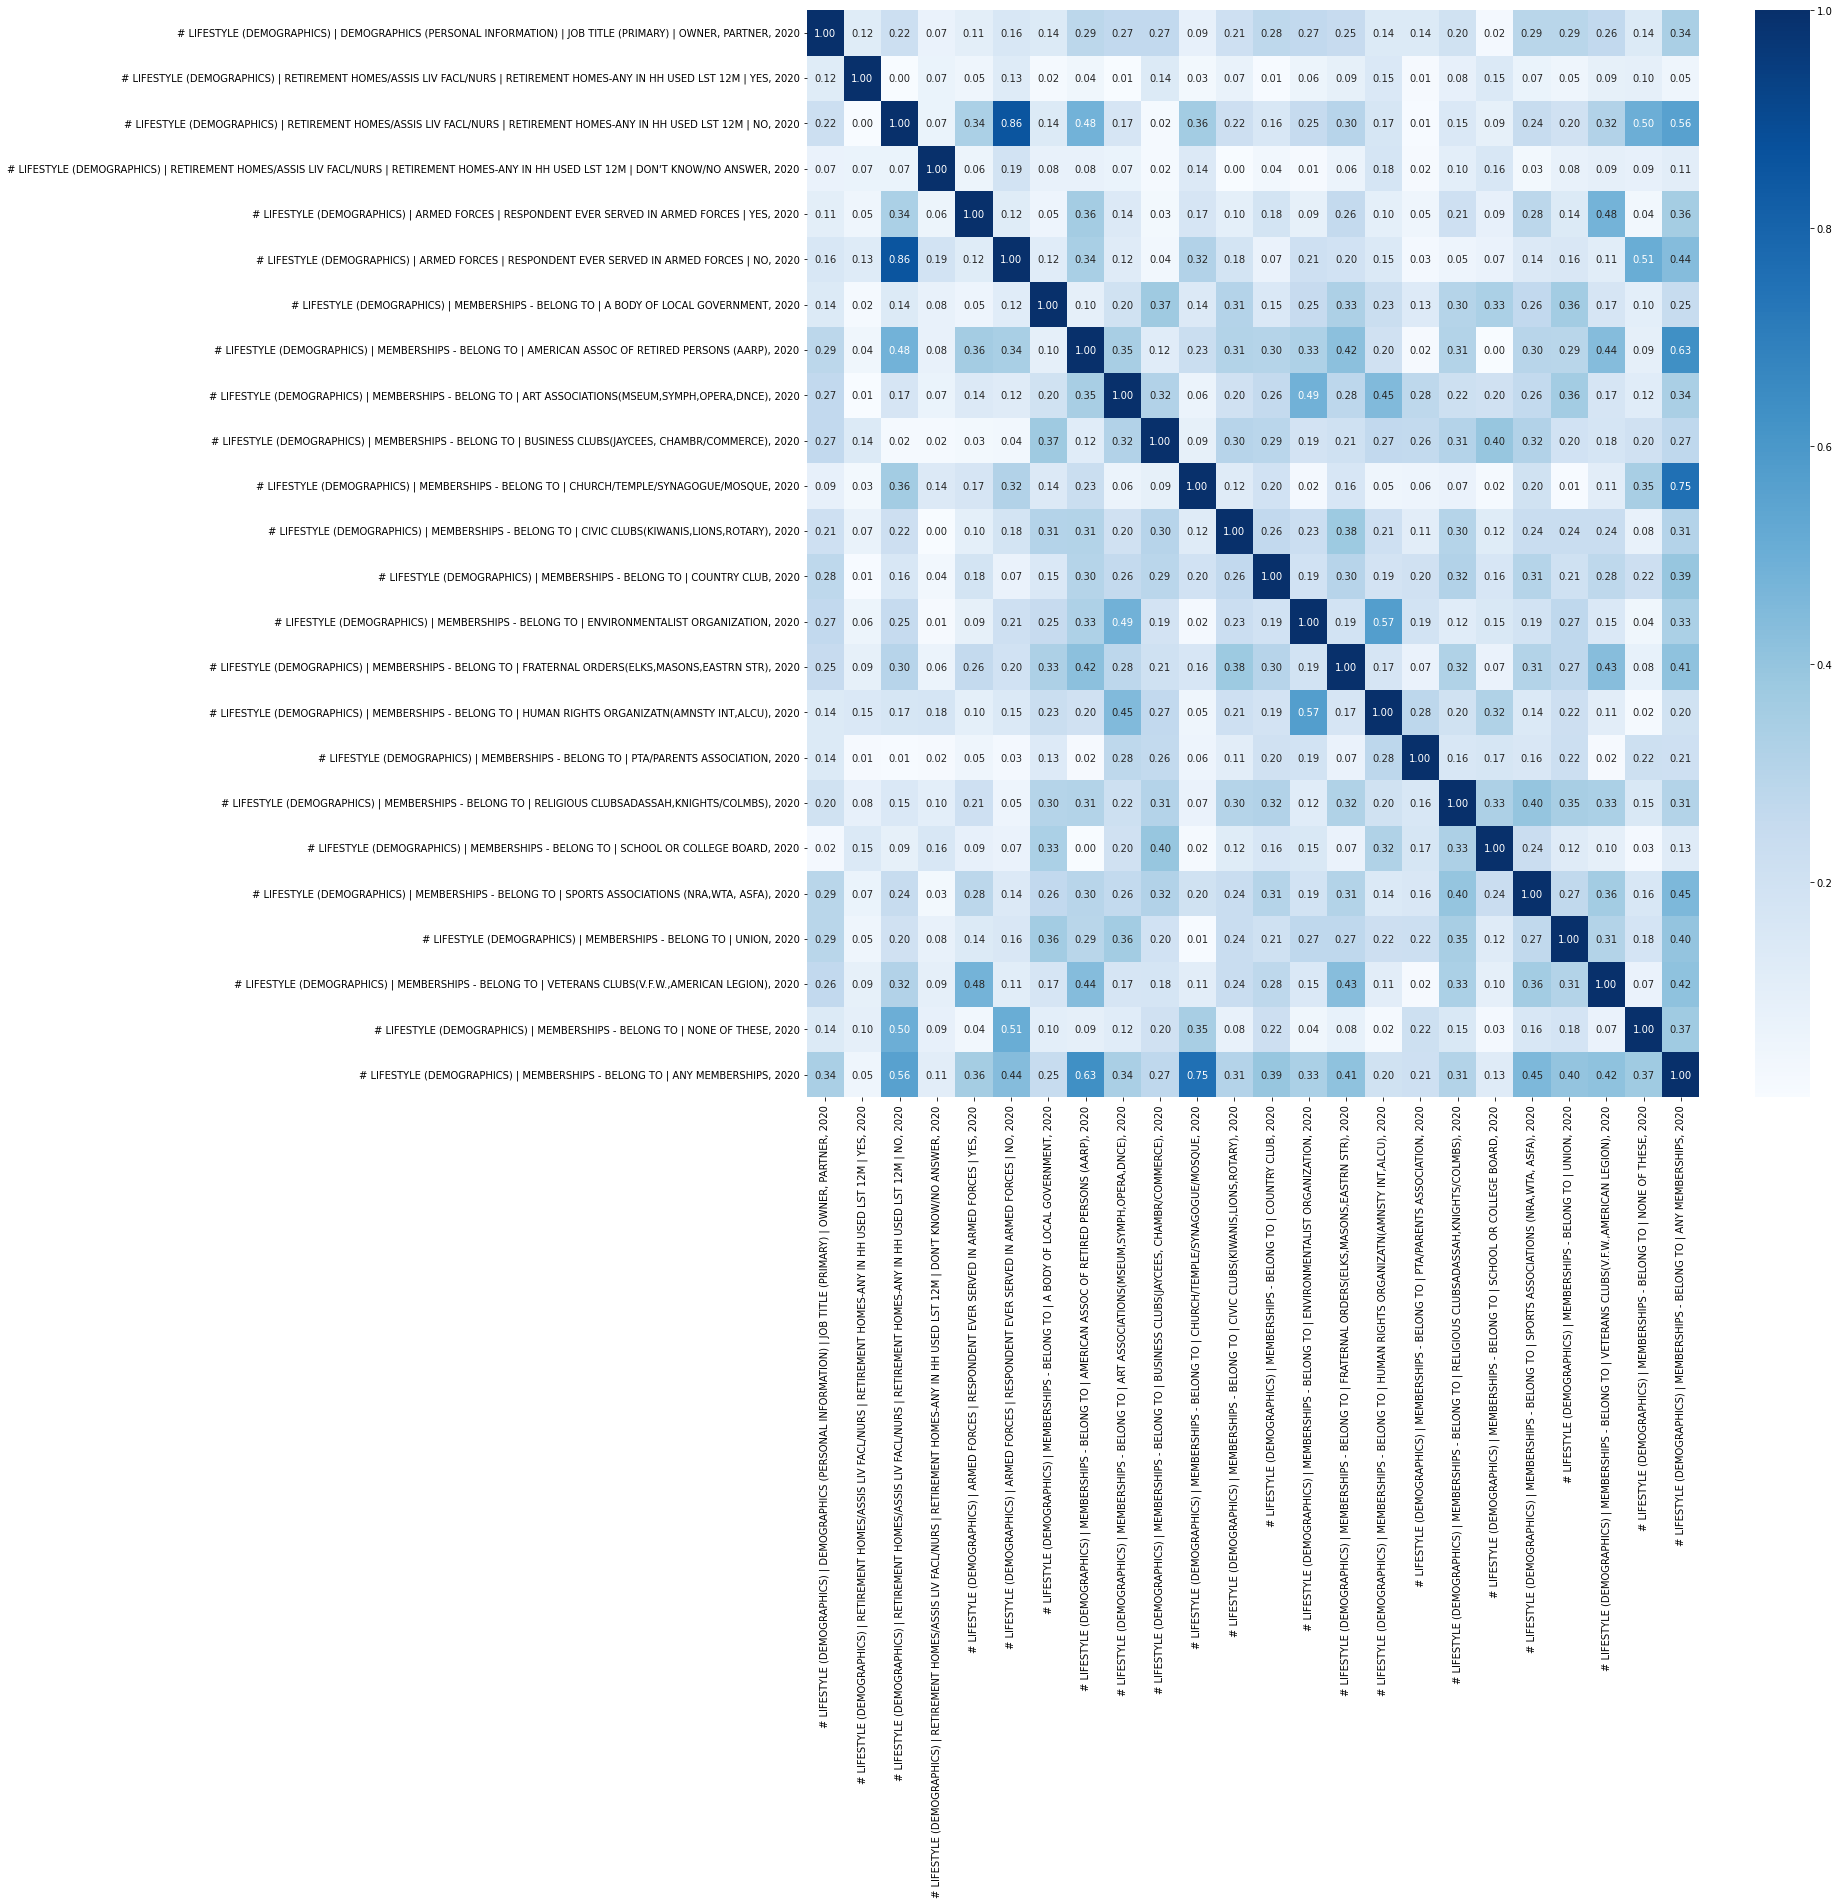

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(demo_plot.corr()),annot=True, fmt=".2f",cmap='Blues');

In [75]:
x = demo_selected

labels = [col for col in demo.columns if "covid" in col.lower()]
y = demo[labels]
# y_lab = y[labels[11]]/y[labels[23]] # mortality
# y_lab = y[labels[11]]
# y_lab = y[labels[11]].div(demo_clean.iloc[:,0]) # death percentage
y_lab = y[labels[23]].div(demo_clean.iloc[:,0]) # case percentage

sum(y_lab.isna())
x = x.loc[~y_lab.isna(),:]
y_lab = y_lab.loc[~y_lab.isna()]

In [76]:
# clean up missing values
for l in labels:
    if l in x.columns:
        x = x.drop(l, axis=1)
bad_col = [c for c in x.columns if x[c].isna().sum() > 10]
x = x.drop(bad_col, axis=1)

for c in x.columns:
    x[c].fillna(value=x[c].mean(), inplace=True)
    

X_train, X_test, y_train, y_test = train_test_split(x, y_lab, test_size=0.15, random_state=42)

In [77]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3221
Data columns (total 59 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   # Age | 5 to 9 years, 2020 [Estimated]                                                        3140 non-null   float64
 1   # Age | 10 to 14 years, 2020 [Estimated]                                                      3140 non-null   float64
 2   # Age | 15 to 17 years, 2020 [Estimated]                                                      3140 non-null   float64
 3   # Age | 18 and 19 years, 2020 [Estimated]                                                     3140 non-null   float64
 4   # Age | 20 to 24 years, 2020 [Estimated]                                                      3140 non-null   float64
 5   # Age | 25 to 34 years, 202

In [78]:
X_test

,"# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]","# Age | 65 to 74 years, 2020 [Estimated]",...,"# Employment Status | Not in labor force, 2020 [Estimated]","# Poverty Status by Age | Population for whom poverty status is determined, 2020 [Estimated]","# Poverty Status by Age | In Poverty, Under 5 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 6 to 11 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 5 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 12 to 14 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 15 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 16 and 17 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 18 to 24 years, 2020 [Estimated]","# Poverty Status by Age | In Poverty, 25 to 34 years, 2020 [Estimated]"
2970,0.071111,0.057249,0.034280,0.032682,0.115489,0.175591,0.118686,0.095273,0.087765,0.072406,...,0.303485,0.952343,0.018334,0.026004,0.001821,0.007568,0.002165,0.004027,0.018779,0.032682
3048,0.064032,0.065769,0.039454,0.022173,0.062150,0.154405,0.147145,0.129563,0.114918,0.080289,...,0.245644,0.991087,0.007130,0.009481,0.001528,0.003552,0.001365,0.002391,0.011608,0.012705
1092,0.067980,0.058324,0.022016,0.010429,0.046736,0.118579,0.079567,0.083816,0.162997,0.125917,...,0.314407,0.980688,0.005794,0.009270,0.002704,0.001159,0.000386,0.000000,0.011201,0.018540
1265,0.042245,0.055078,0.034069,0.018614,0.051528,0.111882,0.105921,0.126930,0.149469,0.139453,...,0.372109,0.986011,0.015667,0.010586,0.002427,0.006237,0.002557,0.003127,0.013094,0.014152
3067,0.065092,0.071462,0.040702,0.019108,0.048004,0.109678,0.096784,0.097406,0.150381,0.100823,...,0.336337,0.981202,0.032158,0.024856,0.003262,0.006369,0.001709,0.008078,0.015846,0.023303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,0.073210,0.062572,0.043365,0.029235,0.071605,0.139011,0.121228,0.113762,0.119380,0.084290,...,0.347611,0.959299,0.031013,0.031707,0.005784,0.010734,0.002844,0.007761,0.025120,0.034814
2571,0.082713,0.085130,0.053900,0.035084,0.062982,0.122174,0.111198,0.100810,0.116098,0.077159,...,0.310728,0.971776,0.029139,0.032863,0.004116,0.009343,0.003136,0.007579,0.022410,0.033320
2488,0.099206,0.055714,0.031587,0.027937,0.072698,0.127619,0.109524,0.098413,0.152063,0.086825,...,0.329841,0.940476,0.000476,0.013810,0.001429,0.009048,0.002540,0.000000,0.012540,0.012540
418,0.045966,0.042293,0.031979,0.019113,0.046505,0.089213,0.093114,0.127874,0.182390,0.165083,...,0.349465,0.986449,0.006309,0.008799,0.001017,0.003943,0.001432,0.001805,0.006329,0.008508


In [79]:
for c in X_train.columns:
    if X_train[c].isna().sum()> 1:
        print(c)
X_train.isna().sum().sum()

0

In [80]:
lm = LinearRegression().fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_pred = lm.predict(X_test)

# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("(Train) Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))
print("(Test) Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-2.54771412e-01 -1.86317509e-01 -1.05987855e-01 -1.98959870e-01
 -9.77721424e-02 -1.19179681e-01 -1.65504520e-01 -2.49370279e-01
 -3.24930317e-01 -3.66316910e-01 -2.94868432e-02  2.82299555e-01
 -1.39506851e-01 -1.84574578e-13  1.83523406e-03 -4.44938693e-03
  3.80218220e-02 -8.49310151e-02 -7.47912220e-02 -1.21821878e+00
  1.60866958e+00  1.48928449e+00  1.29983610e+00  1.36638176e+00
  1.19780688e+00  1.35734428e+00  1.31203902e+00  1.36596129e+00
  4.26941137e-01  1.35375170e-01  4.83479493e-02  9.62459273e-01
  3.51795016e-01  8.22766599e-01 -5.28616573e+00  4.63924371e+00
  4.74135903e+00  4.66897795e+00  4.66545996e+00  4.80688299e+00
  4.44014584e+00  4.01679587e+00 -7.30320873e-01  5.69184488e+00
 -1.71181392e+01  1.13964497e+01  5.58418850e-03 -3.03153991e-01
  1.12445301e+01 -5.82633969e+00 -1.77529035e-01  2.94260444e-02
  3.09045778e-02  1.31301984e-02 -1.04250637e-01 -1.18306236e-01
 -5.06604745e-01  1.80137509e-01 -1.18844931e-01]
Mean squared error: 0.00

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.022587522309048234

In [82]:
y_train.median()

0.06337145751686261

In [87]:
rf = RandomForestRegressor(max_depth = 20,n_estimators=100)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
# The coefficients
# print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("(Train) Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))
print("(Test) Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.00049741
(Train) Coefficient of determination: 0.71
(Test) Coefficient of determination: 0.36


C:\Users\sun_y\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\sun_y\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for 

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.022005204326264717